# Intro:
pandas is an in-memory analysis tool, which has SQL-like constructs, essential statistical and analytic support, as well as graphing capability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.color_palette("hls", 15)

import pandas as pd


print(f"version:: {pd.__version__}")
print(pd.show_versions())

version:: 2.1.4


c:\Users\muthu\miniconda3\envs\venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



INSTALLED VERSIONS
------------------
commit              : a671b5a8bf5dd13fb19f0e88edc679bc9e15c673
python              : 3.10.13.final.0
python-bits         : 64
OS                  : Windows
OS-release          : 10
Version             : 10.0.22621
machine             : AMD64
processor           : AMD64 Family 25 Model 68 Stepping 1, AuthenticAMD
byteorder           : little
LC_ALL              : None
LANG                : None
LOCALE              : English_India.1252

pandas              : 2.1.4
numpy               : 1.26.2
pytz                : 2023.3.post1
dateutil            : 2.8.2
setuptools          : 68.2.2
pip                 : 23.3.1
Cython              : None
pytest              : None
hypothesis          : None
sphinx              : None
blosc               : None
feather             : None
xlsxwriter          : None
lxml.etree          : None
html5lib            : None
pymysql             : None
psycopg2            : None
jinja2              : 3.1.2
IPython            

# Data Structure
At the core of pandas are two data structures. `Series` and `Dataframe`

| Data Structure | Dimensionality | Spreadsheet Analog | Database Analog | Linear Algebra |
|----------------|----------------|--------------------|-----------------|----------------|
| Series         |   1D           | Column             | Column          | Column vector  |
| Dataframe      |   2D           | Single Sheet       | Table           | Matrix         |

# Series

## Index Abstraction

In [2]:
# In Python, 
series:dict = {
    'index':[0,1,2,3],
    'data':[145,142,38,13],
    'name':'songs'
}
print(series)

def get(series:dict,idx:int)->int:
    value_idx = series['index'].index(idx)
    return series['data'][value_idx]

print(get(series=series,idx=1))
print(get(series=series,idx=3))



# Another example, bit different
songs:dict = {
    'index':['Paul',"John",'Muthu',"Laksh"],
    'data':[145,142,38,13],
    'name':'counts'
}
print(songs)

print(get(songs,idx='Muthu'))

# This dobule Astraction of the index seems unnecessary but trick up pandas's sleeves. By allowing non-int values like dates,string.

{'index': [0, 1, 2, 3], 'data': [145, 142, 38, 13], 'name': 'songs'}
142
13
{'index': ['Paul', 'John', 'Muthu', 'Laksh'], 'data': [145, 142, 38, 13], 'name': 'counts'}
38


## pandas Series
![Series](./assets/pandas%20series%20img.png)

Even though this looks two-dimensional, remember that the index is not part of the
values

To get the best speed (and to leverage vectorized operations), the `Values` should be of the same type, though this is not required

In [3]:
songs2 = pd.Series([145,142,38,13],name='counts')
print(songs2)
print(f"index:: {songs2.index}")

0    145
1    142
2     38
3     13
Name: counts, dtype: int64
index:: RangeIndex(start=0, stop=4, step=1)


## The NaN values

- stands for `Not A Number` similar to NULL in SQL
- `None`, `NaN`, `nan`,`<NA>`, and `null` are synonyms in this book when referring to empty or missing data
found in a pandas series or dataframe.

In [4]:
nan_series = pd.Series([2,np.nan],index=["Ono",'Clapton'])
print(nan_series)
# Not type is float64 not int64. internally it coerced values to float value

print(f"count function :: {nan_series.count()}")  # Ignoring NaN values
print(f"size property  :: {nan_series.size}")     # Includes missing value

Ono        2.0
Clapton    NaN
dtype: float64
count function :: 1
size property  :: 2


## Optional Integer Support for NaN

In [5]:
nan_series2 = pd.Series([2,None],index=['Ono','Claption'],dtype='Int64')
print(nan_series2)


print(f"count function :: {nan_series2.count()}")  # Ignoring NaN values
print(f"size property  :: {nan_series2.size}")     # Includes missing value

Ono            2
Claption    <NA>
dtype: Int64
count function :: 1
size property  :: 2


## Similar to Numpy
- Index operations
![FIltering with boolean Array](./assets/filteting%20in%20pandas.png)

In [6]:
numpy_ser = np.array([145 , 142 , 38 , 13])
print(f"numpy series index 1 :: {numpy_ser[1]}")
print(f"numpy mean :: {numpy_ser.mean()}")


songs3 = pd.Series(index=['Paul',"John","George","Ringo"],data=[145,142,38,13])
print(f"median of songs :: {songs3.median()}")
mask = songs3 > songs3.median()
print(f"mask::\n{mask}")
print(f"modified songs::\n{songs3[mask]}")

numpy series index 1 :: 142
numpy mean :: 84.5
median of songs :: 90.0
mask::
Paul       True
John       True
George    False
Ringo     False
dtype: bool
modified songs::
Paul    145
John    142
dtype: int64


## Categorical  Data

- If our data is limited to few values, we might want to use categorical data. 
- Benefits:
    -   Use less memory than string
    -   Improve performance
    -   can have an Ordering
    -   can perform operation on categories
    -   Enforce membership on values
- category not limited to string. we can convert numbers or datetime values to category
- `.astype("catgory")` or `dtype='category'`
- `pd.api.types.CategoricalDtype`



| Method | Description |
|--------|-------------|
|pd.Series(data=None, index=None,dtype=None, name=None, copy=False) |  Create a series from data (sequence, dictionary, or scalar).|
| s.index | Access index of series. |
| s.astype(dtype, errors='raise') | Cast a series to dtype. To ignore errors (and return original object) use errors='ignore'.|
| s[boolean_array] | Return values from s where boolean_array is True.
| s.cat.ordered | Determine if a categorical series is ordered.|
| s.cat.reorder_categories( new_categories, ordered=False) |Add categories (potentially ordered) to the series new_categories must include all categories.|

In [7]:
s = pd.Series(['m','l','xs','s','xl'],dtype='category')
print(f"s::\n{s}")

# In nature there is a ordering like small, medium, ... extra-large
print(f"is it ordered:: {s.cat.ordered}")

# To convert into ordered
s2 = pd.Series(data=['m','l','xs','s','xl'])
size_type = pd.api.types.CategoricalDtype(categories=['s','m','l'],ordered=True)
print(f"ordered size_type:: {size_type}")

s3 = s2.astype(size_type)
print(s3)                       # getting NaN because we limited to few sizes
print(f"is it s3 ordered:: {s3.cat.ordered}")


print(f"filtering s3::\n{s3[s3>'s']}")


# Other way,
s = s.cat.reorder_categories(['xs','s','m','l','xl'],ordered=True)
print(f"s::\n{s}")
print(f"is it ordered:: {s.cat.ordered}")

s::
0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']
is it ordered:: False
ordered size_type:: category
0      m
1      l
2    NaN
3      s
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']
is it s3 ordered:: True
filtering s3::
0    m
1    l
dtype: category
Categories (3, object): ['s' < 'm' < 'l']
s::
0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']
is it ordered:: True


In [8]:
colors = pd.Series(['red','blue','green','violet','orange'],dtype='category')
print(colors)

0       red
1      blue
2     green
3    violet
4    orange
dtype: category
Categories (5, object): ['blue', 'green', 'orange', 'red', 'violet']


# Series Deep Dive

there were many operations you can do with a Series

## Loading the Data

If zip file has only one csv,we can directly read `.read_csv`. Whereas multiple files, we would need to decompress the data to pull out the file we are interested in.

In [9]:
df:pd.DataFrame    = pd.read_csv("./assets/vehicles.csv.zip")
city_mpg:pd.Series = df.city08
highway_mpg:pd.Series = df.highway08

C:\Users\muthu\AppData\Local\Temp\ipykernel_9932\2635989666.py:1: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df:pd.DataFrame    = pd.read_csv("./assets/vehicles.csv.zip")


## Series Attributes

There are many ways to categorize these, and I’m roughly going to do it by what the result of the method is:
-   Dunder methods (.__add__,.__iter__,etc) provide many numeric operation, looping, attribute access and index access. For numeric operations, these return Series
-   Corresponding operator methods for many of the numeric operations allow us to tweak the behaviout (.add method in addition to .__add__)
-   Aggregate methods and | | | | | | | | Properties which reduce or aggregate the values in a series down to single scler value like (.mean, .max, .sum, .is_monotonic property)
-   conversion methods. some of these start with .to_ and export the data to other format (parquet,sql,excel,csv,json..)
- manipulation methods. some of like (.sort_values, .drop_duplicates) returns Series with same index
-   Indexing and accessor methods and attributes like .loc and .iloc (Series or Scaler)
-   String manipulation methods using .str
-   Date   manipulation methods using .dt
-   Plotting methods  using .plot
-   Categorical manipaulation using   .cat
-   PLotting methods using .plot
-   Transformation methods such as .unstack, .reset_index, .agg, .transform
-   Attributes such as .index and .dtype
-   A bunch of private attributes that we will ignored.

In [10]:
print(f"how many functions associated with Series:: {len([ _ for _ in dir(pd.Series) if not _.startswith('_') ])}")

how many functions associated with Series:: 207


# Operators

## Intro
Will see some protocols that determine how the python language reacts to operations,

-   use the `+` operation, Python is dispatching to the `.__add__` method.
-   use a loop with a `for` statement, Python dispatches to the `.__iter__` method


## Dunder Methods

In [11]:
add_two_numbers  = 2+4
print(f"2+4 :: {add_two_numbers}")

add_two_numbers2 = (2).__add__(4)
print(f"(2).__add__(4) :: {add_two_numbers2}")

# Operation on Series
print(f"operation on series::\n{(city_mpg + highway_mpg)/2}")

2+4 :: 6
(2).__add__(4) :: 6
operation on series::
0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64


## Index Alignment

While doing operations, pandas check index alignment. make sure that the indexes:
-   Are unique (no duplicates)
-   Are common to both serie

![Duplicate index Alignment](./assets/duplicate%20index%20alignment.png)

In [12]:
s1:pd.Series = pd.Series([10,20,30],index=[1,2,2]) 
s2:pd.Series = pd.Series([35,44,53],index=[2,2,4],name='s2')

print(f"s1::\n{s1}")
print(f"s2::\n{s2}")
print(f"s1+s2::\n{s1+s2}")

s1::
1    10
2    20
2    30
dtype: int64
s2::
2    35
2    44
4    53
Name: s2, dtype: int64
s1+s2::
1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64


## Broadcasting

When we perform math operation with a scaler, pandas do broadcasts the operation to all values.

With many math operations, these are optimized and happen very quickly in the CPU. This is called vectorizationn. (A numeric pandas series is a block of memory, and modern CPUs leverage a technology called Single Instruction/Multiple Data (SIMD) to apply a math operation to the block of memory..

In [13]:
print(f"add scaler::\n{s1 + 20}")

add scaler::
1    30
2    40
2    50
dtype: int64


## Iteration

recommend avoiding using a for loop with a series, loose power of vectorization and operating at C level

## Operator Methods

In [14]:
# So Instead of + operator

print(f"add operator::\n{s1.add(s2)}")  # results Same
print(f"add operator add fill_value parameter::\n{s1.add(s2,fill_value=0)}")

add operator::
1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64
add operator add fill_value parameter::
1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64


## Chaining

prefer operator methods so that it makes `chaining` manipulation easier.

`Note`: most of pandas methods do not mutate data in-place but instead returns a new object


| Method     | Operator        | Description |
|------------|-----------------|-------------|
| s.add(s2)  | s + s2          | Adds series |
| s.radd(s2) | s2 + s          | Adds series |
| s.sub(s2)  | s - s2          | Subtracts series |
| s.rsub(s2) | s2 - s          | Subtracts series |
| s.mul(s2)  s.multiply(s2)   | s * s2  | Multiplies series |
| s.rmul(s2) | s2 * s | Multiplies series |
| s.div(s2) s.truediv(s2) | s / s2 | Divides series |
|s.rdiv(s2) s.rtruediv(s2)| s2 / s | Divides series|
|s.mod(s2)   | s % s2          | Modulo of series division|
|s.rmod(s2)  | s2 % s          | Modulo of series division|
|s.floordiv(s2) |  s // s2     | Floor divides series|
|s.rfloordiv(s2) | s2 // s     | Floor divides series|
|s.pow(s2)   | s ** s2         | Exponential power of series|
|s.rpow(s2)  | s2 ** s         | Exponential power of series|
|s.eq(s2)    | s2 == s         | Elementwise equals of series|
|s.ne(s2)    | s2 != s | Elementwise not equals of series|
|s.gt(s2) |s > 2| Elementwise greater than of series|
|s.ge(s2) |s >= 2| Elementwise greater than or equals of series|
|s.lt(s2) |s < 2| Elementwise less than of series|
|s.le(s2) |s <= 2 |Elementwise less than or equals of series|
|np.invert(s) |~s| Elementwise inversion of boolean series (no pandas method).|
|np.logical_and(s, s2) |s & s2 |Elementwise logical and of boolean series (no pandas method).|
|np.logical_or(s, s2) |s I s2| Elementwise logical or of boolean series (no pandas method)|

In [15]:
print(f"normal operation::\n{(city_mpg+highway_mpg)/2}")
print(f"chaining::\n{(city_mpg.add(highway_mpg)).div(2)}")

normal operation::
0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64
chaining::
0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
41139    22.5
41140    24.0
41141    21.0
41142    21.0
41143    18.5
Length: 41144, dtype: float64


# Aggregate Methods

Aggregate methods collapse the values of a series down to scaler. It allow you to take detailed data and collapse it to a single value.

## Aggregation

In [16]:
# example aggregation method
print(f"mean of city mpg ::{city_mpg.mean()}")

# Few aggregate properties.
print(f"is_unique ::{city_mpg.is_unique}")
print(f"is_  monotonic_increase ::{city_mpg.is_monotonic_increasing}")

mean of city mpg ::18.369045304297103
is_unique ::False
is_  monotonic_increase ::False


![Series Aggregation](./assets/series%20aggregation.png)
- aggregation returns scaler and series as well!

In [17]:
print(f".8 quantile :: {city_mpg.quantile(.8)}")
print(f"list of quantile [.1,.5,.8] ::\n{city_mpg.quantile(q=[.1,.5,.8])}")

.8 quantile :: 21.0
list of quantile [.1,.5,.8] ::
0.1    13.0
0.5    17.0
0.8    21.0
Name: city08, dtype: float64


## Count and Mean of an Attribute
trick for calc mean using chaining functions

Chaining is also called "flow" programming. Rather than making intermediate variables, just leverage the fact that most operations return a new object and work on that.

The chain should read like a recipe of ordered steps.

In [18]:
(
    city_mpg
    .gt(20)
    .multiply(100)
    .mean()
)

24.965973167412017

## .agg and Aggregation Strings

`.agg` methood does aggregation where it shines is in the ability to perform multiple aggregation. We can pass in the names of aggregation methods, Numpy reduction functions, Python aggregation, or define your own aggregation function.



| Method |  Description | 
|--------|--------------|
| 'all'  | Returns True if every value is truthy. |
| 'any'  | Returns True if any value is truthy. | 
| 'autocorr' |  Returns Pearson correlation of series with shifted self. Can override lag as keyword argument(default is 1).| 
| 'corr' | Returns Pearson correlation of series with other series. Need to specify other.  `pearson`,`spearman`, `kendall`, or a callable | 
| 'count'|  Returns count of non-missing values. | 
| 'cov' | Return covariance of series with other series. Need to specify other. | 
| 'dtype'|  Type of the series.| 
| 'dtypes'|  Type of the series. | 
| 'empty' | True if no values in series.| 
| 'hasnans'|  True if missing values in series| 
| 'idxmax' | Returns index value of maximum value. |
| 'idxmin' | Returns index value of minimum value. |
| 'is_monotonic' | True if values always increase. |
| 'is_monotonic_decreasing'|  True if values always decrease. |
| 'is_monotonic_increasing' | True if values always increase. |
| 'kurt' | Return ”excess” kurtosis (0 is normal distribution). Values greater than 0 have more outliers than normal. |
| 'mad' | Return the mean absolute deviation. |
| 'max' | Return the maximum value. |
| 'mean'| Return the mean value. |
|'median' | Return the median value. |
| 'min' | Return the minimum value. |
|'nbytes'| Return the number of bytes of the data. |
| 'ndim' | Return the number of dimensions (1) of the data. |
| 'nunique' | Return the count of unique values.|
| 'quantile' | Return the median value. Can override q to specify other quantile.|
| 'sem' | Return the unbiased standard error. |
| 'size'| Return the size of the data.|
|'skew'| Return the unbiased skew of the data. Negative indicates tail is on the left side. |
|'std'| Return the standard deviation of the data.|
|'sum' |Return the sum of the series.|

In [19]:
def second_to_last(s):
    return s.iloc[-2]

city_mpg.agg(['mean',np.min,np.var,max,second_to_last])

C:\Users\muthu\AppData\Local\Temp\ipykernel_9932\3362801592.py:4: FutureWarning: The provided callable <function min at 0x00000229EF514700> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  city_mpg.agg(['mean',np.min,np.var,max,second_to_last])
C:\Users\muthu\AppData\Local\Temp\ipykernel_9932\3362801592.py:4: FutureWarning: The provided callable <function var at 0x00000229EF515120> is currently using Series.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  city_mpg.agg(['mean',np.min,np.var,max,second_to_last])
C:\Users\muthu\AppData\Local\Temp\ipykernel_9932\3362801592.py:4: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "ma

mean               18.369045
min                 6.000000
var                62.503036
max               150.000000
second_to_last     18.000000
Name: city08, dtype: float64

In [20]:
print(f"count non-missing value of a series :: {city_mpg.notna().count()}")

print(f"number of entries :: {city_mpg.shape[0]}")

print(f"number of unique entries:: {len(city_mpg.unique())}")  # .unqiue() returns ndarray

print(f"mean :: {city_mpg.mean()}")

print(f"max :: {city_mpg.max()}")


def count_notna(s:pd.Series)->int:
    return s.dropna().count()
print(f"using .agg method ::\n{city_mpg.agg([count_notna,'count','nunique','mean','max'])}")

count non-missing value of a series :: 41144
number of entries :: 41144
number of unique entries:: 105
mean :: 18.369045304297103
max :: 150
using .agg method ::
count_notna    41144.000000
count          41144.000000
nunique          105.000000
mean              18.369045
max              150.000000
Name: city08, dtype: float64


# Conversion Methods

Sometimes you will need to change the type of the data. This may be due to formats that do not include type information, or it may be that you can have better performance (more manipulation options or use less memory) by changing types.

## Automatic Conversion

In [21]:
city_mpg.convert_dtypes('Int8')  # Not recommended. WHY??

try:
    city_mpg.astype('Int8')
except Exception as e:
    print(e.__repr__())
    print("Explicit type casting")
    

TypeError('cannot safely cast non-equivalent int64 to int8')
Explicit type casting


In [22]:
print(f"int64 ::\n{np.iinfo('int64')}")
print(f"uint8 ::\n{np.iinfo('uint8')}")
print(f"float16 ::\n{np.finfo('float16')}")

int64 ::
Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

uint8 ::
Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

float16 ::
Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
smallest_normal = 6.10352e-05   smallest_subnormal = 5.96046e-08
---------------------------------------------------------------



## Memory Usage

calc using `.nbytes` and `.memory_usage`

In [23]:
print(f"type :: {city_mpg.dtype}")

print(city_mpg.nbytes)         # only shows how much memory the Pandas object is taking
print(city_mpg.memory_usage()) # .memory_usage includes the index memory and can include the contribution from object types

print(city_mpg.memory_usage(deep=True))

type :: int64
329152
329280
329280


## String and Category Types


In [24]:
print(f"str type ::\n{city_mpg.astype(str)}")
print(f"category type ::\n{city_mpg.astype('category')}")

str type ::
0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: object
category type ::
0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6, 7, 8, 9, ..., 137, 138, 140, 150]


## Ordered Categories
- will define ordered categories.


| String or Type |  Description |
|----------------|--------------|
| str 'str'      | Convert type to Python string |
| 'string'       | Convert type to pandas string (supports pd.NA) |
| int 'int' 'int64' |  Convert type to NumPy int64 |
| 'int32' 'uint32' | Convert type to 32 signed or unsigned NumPy integer (can also use 16 and 8).|
| 'Int64' | Convert type to pandas Int64 (supports pd.NA). Might complain when you convert floats or strings.|
| float 'float' 'float64' | Convert type to NumPy float64 (can also support 32 or 16). |
| 'category' | Convert type to categorical (supports pd.NA). Can also use instance of CategoricalDtype. |
| dates | Don’t use this for date conversion, use pd.to_datetime.|


In [25]:
values:pd.Series = pd.Series(sorted(set(city_mpg)))

print(f"unique values in city mpg :: {len(values)}")
city_type = pd.CategoricalDtype(categories=values,ordered=True)
print(f"type: {city_type}")

print(f"ordered city_msg as per values ::\n{city_mpg.astype(city_type)}")

unique values in city mpg :: 105
type: category
ordered city_msg as per values ::
0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: category
Categories (105, int64): [6 < 7 < 8 < 9 ... 137 < 138 < 140 < 150]


## Converting to Other Types

- to_sql
- to_dict
- to_excel
- to_parquet
- to_json....

In [26]:
print(city_mpg.to_frame())  # move to dataframe

       city08
0          19
1           9
2          23
3          10
4          17
...       ...
41139      19
41140      20
41141      18
41142      18
41143      16

[41144 rows x 1 columns]


#  Manipulation Methods
workhorses of pandas
- understand
- clean up
- model

## .apply and .where

.apply method allows you to apply a function element-wise to every value/
Setback : If you million reocrds, it will be called million times. It breaks out the fast vectorized code paths we can leverage in pandas and puts back to string slow python code

In [27]:
def gt20(val):
    return val>20

In [28]:
%%timeit
city_mpg.apply(gt20)

4.12 ms ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
%%timeit
city_mpg.gt(20)

54.5 µs ± 214 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
make = df['make']
print(make)

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object


In [31]:
top5 = make.value_counts().index[:5]
def generalize_top5(val):
    if val in top5: return val
    return 'Other'

In [32]:
%%timeit
make.apply(generalize_top5)

30.2 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
make.where(make.isin(top5),other="Other")

1.49 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


![leverage .where method](./assets/where%20method.png)

By Seeing above example, we can verify signifiant change in time

`.mask` will do opposite way.
- if condition is False it'll keep original value
- if condition is True  it'll assign new value

In [34]:
# make.where(make.isin(top5),other="Other") Equivalent
print(f"applying mask method ::\n{make.mask(~make.isin(top5),other='Other')}")

applying mask method ::
0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
41139    Other
41140    Other
41141    Other
41142    Other
41143    Other
Name: make, Length: 41144, dtype: object


## If Else
- by applying `.mask`, `.where` in chaining fashion
- `np.select` longer if else statement

In [35]:
vc = make.value_counts()
top5 = vc.index[:5]
top10= vc.index[:10]

def generalize(val):
    if val in top5: return 'top5'
    if val in top10: return 'top10'
    return 'Other'

In [36]:
%%timeit
make.apply(generalize)

47.5 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%%timeit
pd.Series(
    data= np.select(
        condlist  = [make.isin(top5),make.isin(top10)],
        choicelist= ['top5','top10'],
        default  ="Other"
        ),
    index=make.index
)

5.32 ms ± 53.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Missing Data
many ML algorithms do not work if there is missing data

In [38]:
cyl = df['cylinders']
print(f"number of na :: {cyl.isna().sum()}")

print(f"missing ::\n{make.loc[cyl.isna()]}")

number of na :: 206
missing ::
7138     Nissan
7139     Toyota
8143     Toyota
8144       Ford
8146       Ford
          ...  
34563     Tesla
34564     Tesla
34565     Tesla
34566     Tesla
34567     Tesla
Name: make, Length: 206, dtype: object


Telsa car because it has electric engine, not combustion engine - has ZERO cylinder

## Filling in Missing Data

![ways of filling missing data](./assets/missing%20data%20for%20series.png)

## Interpolating Data

Other operation for replacing missing data is `.interpolate`

In [39]:
temp = pd.Series([32,40,None,42,39,32])
print(f"temp::\n{temp}")

print(f"interpolate temp ::\n{temp.interpolate()}")

temp::
0    32.0
1    40.0
2     NaN
3    42.0
4    39.0
5    32.0
dtype: float64
interpolate temp ::
0    32.0
1    40.0
2    41.0
3    42.0
4    39.0
5    32.0
dtype: float64


## Clipping 

In fact, if you dig into the implementation of .clip, you will see a call to .where. Below is a
portion of the ._clip_with_scalar method that .clip calls:

```python
if upper is not None :
    subset = self . to_numpy () <= upper
    result = result . where ( subset , upper )
if lower is not None :
    subset = self . to_numpy () >= lower
    result = result . where ( subset , lower )
```

In [40]:
city_mpg.loc[:446]

0      19
1       9
2      23
3      10
4      17
       ..
442    15
443    15
444    15
445    15
446    31
Name: city08, Length: 447, dtype: int64

In [41]:
print(f"quantile:.05 :: {city_mpg.quantile(.05)}")
print(f"quantile:.95 :: {city_mpg.quantile(.95)}")
(
    city_mpg
        .loc[:446]
        .clip(lower=city_mpg.quantile(.05), upper=city_mpg.quantile(0.95))
)

quantile:.05 :: 11.0
quantile:.95 :: 27.0


0      19
1      11
2      23
3      11
4      17
       ..
442    15
443    15
444    15
445    15
446    27
Name: city08, Length: 447, dtype: int64

## Sorting Value

In [42]:
city_mpg.sort_values()

7901       6
34557      6
37161      6
21060      6
35887      6
        ... 
34563    138
34564    140
32599    150
31256    150
33423    150
Name: city08, Length: 41144, dtype: int64

## Sorting the Index


In [43]:
city_mpg.sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

## Dropping Duplicates

Many datasets have duplicate entries. whether to keep the first or last duplicate value found using
the keep parameter.
```py
.drop_duplicates(keep="first")   # default
.drop_duplicates(keep="last") 
.drop_duplicates(keep=False)
```

![Drop Duplicates](./assets/drop%20duplicates.png)

In [44]:
city_mpg.drop_duplicates(keep=False)

8147      84
23028     59
23029     79
24471    107
25699     60
25953     93
32740    131
32842    125
34173    123
34364    127
34409    114
34564    140
34565    115
34566    104
Name: city08, dtype: int64

## Ranking Data

`.rank` method will return a series that keeps the original index but uses the ranks of values from
the original series

- average: average rank of the group
- min: lowest rank in the group
- max: highest rank in the group
- first: ranks assigned in order they appear in the array
- dense: like 'min', but rank always increases by 1 between groups

In [45]:
city_mpg.rank(method='average') #method = ['average', 'min', 'max', 'first', 'dense']

0        27060.5
1          235.5
2        35830.0
3          607.5
4        19484.0
          ...   
41139    27060.5
41140    29719.5
41141    23528.0
41142    23528.0
41143    15479.0
Name: city08, Length: 41144, dtype: float64

In [46]:
city_mpg.rank(method='min') 

0        25555.0
1          136.0
2        35119.0
3          336.0
4        17467.0
          ...   
41139    25555.0
41140    28567.0
41141    21502.0
41142    21502.0
41143    13492.0
Name: city08, Length: 41144, dtype: float64

In [47]:
city_mpg.rank(method='dense') 

0        14.0
1         4.0
2        18.0
3         5.0
4        12.0
         ... 
41139    14.0
41140    15.0
41141    13.0
41142    13.0
41143    11.0
Name: city08, Length: 41144, dtype: float64

## Replacing Data

`.replace` method allows you to map values to new values. 
we can add regex by rege=True parameter

In [48]:
make.replace('Subaru','スバル ⚡')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4             スバル ⚡
            ...    
41139         スバル ⚡
41140         スバル ⚡
41141         スバル ⚡
41142         スバル ⚡
41143         スバル ⚡
Name: make, Length: 41144, dtype: object

In [49]:
make.replace(to_replace=r'(Fer)ra(r.*)',value=r'\2-muthu-\1',regex=True)

0          Alfa Romeo
1        ri-muthu-Fer
2               Dodge
3               Dodge
4              Subaru
             ...     
41139          Subaru
41140          Subaru
41141          Subaru
41142          Subaru
41143          Subaru
Name: make, Length: 41144, dtype: object

## Binning
bin data. by using `.cut` or `qcut` options

- `.cut` splits data into equal parts and returns dtype as category if you specifc size of bins edges we can specify those

- `qcut`can bin data with quantiles instead.

In [50]:
pd.cut(city_mpg,bins=10)

0        (5.856, 20.4]
1        (5.856, 20.4]
2         (20.4, 34.8]
3        (5.856, 20.4]
4        (5.856, 20.4]
             ...      
41139    (5.856, 20.4]
41140    (5.856, 20.4]
41141    (5.856, 20.4]
41142    (5.856, 20.4]
41143    (5.856, 20.4]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.856, 20.4] < (20.4, 34.8] < (34.8, 49.2] < (49.2, 63.6] ... (92.4, 106.8] < (106.8, 121.2] < (121.2, 135.6] < (135.6, 150.0]]

In [51]:
pd.cut(city_mpg,[0,10,20,40,70,150])

0        (10, 20]
1         (0, 10]
2        (20, 40]
3         (0, 10]
4        (10, 20]
           ...   
41139    (10, 20]
41140    (10, 20]
41141    (10, 20]
41142    (10, 20]
41143    (10, 20]
Name: city08, Length: 41144, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 20] < (20, 40] < (40, 70] < (70, 150]]

In [52]:
pd.qcut(city_mpg,10)

0         (18.0, 20.0]
1        (5.999, 13.0]
2         (21.0, 24.0]
3        (5.999, 13.0]
4         (16.0, 17.0]
             ...      
41139     (18.0, 20.0]
41140     (18.0, 20.0]
41141     (17.0, 18.0]
41142     (17.0, 18.0]
41143     (15.0, 16.0]
Name: city08, Length: 41144, dtype: category
Categories (10, interval[float64, right]): [(5.999, 13.0] < (13.0, 14.0] < (14.0, 15.0] < (15.0, 16.0] ... (18.0, 20.0] < (20.0, 21.0] < (21.0, 24.0] < (24.0, 150.0]]

In [53]:
city_mpg.quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.1     13.0
0.2     14.0
0.3     15.0
0.4     16.0
0.5     17.0
0.6     18.0
0.7     20.0
0.8     21.0
0.9     24.0
1.0    150.0
Name: city08, dtype: float64

In [54]:
pd.qcut(city_mpg,10,labels=list(range(1,11)))

0        7
1        1
2        9
3        1
4        5
        ..
41139    7
41140    7
41141    6
41142    6
41143    4
Name: city08, Length: 41144, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

# Indexing Operation

Indexing is an overloaded term in the pandas world. Both a series and a dataframe have an index.

- `.iloc` and `loc`

## Renaming the index

In [55]:
make.index

RangeIndex(start=0, stop=41144, step=1)

## Resetting the index

In [56]:
make.rename(index={1:'first'})

0        Alfa Romeo
first       Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

In [57]:
def to_str(val):
    return f"id-{val}"

make.rename(to_str)

id-0        Alfa Romeo
id-1           Ferrari
id-2             Dodge
id-3             Dodge
id-4            Subaru
               ...    
id-41139        Subaru
id-41140        Subaru
id-41141        Subaru
id-41142        Subaru
id-41143        Subaru
Name: make, Length: 41144, dtype: object

In [58]:
make.rename(index="first")  # Change name of Series

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: first, Length: 41144, dtype: object

In [59]:
city_mpg.reset_index()

,index,city08
0,0,19
1,1,9
2,2,23
3,3,10
4,4,17
...,...,...
41139,41139,19
41140,41140,20
41141,41141,18
41142,41142,18


In [60]:
city_mpg.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

In [61]:
city_mpg.rename_axis('city_mpgs').reset_index()

,city_mpgs,city08
0,0,19
1,1,9
2,2,23
3,3,10
4,4,17
...,...,...
41139,41139,19
41140,41140,20
41141,41141,18
41142,41142,18


## .loc Attributes

`.loc` attribute deals with index labels.
 
- A scalar value of one of the index labels
- A list of index labels.
- A slice of labels (closed interval so it includes the stop value).
- An index.
- A boolean array (same index labels as the series, but with True or False values.
- A function that accepts a series and returns one of the above

In [62]:
df.loc[(city_mpg>15) & (make=='Ferrari'),['charge120','city08']]

,charge120,city08
28144,0.0,16
28145,0.0,16
29612,0.0,16
29613,0.0,16
29751,0.0,16
30450,0.0,16
30561,0.0,16
30562,0.0,16
30728,0.0,16
30783,0.0,16


In [63]:
city_mpg.loc[pd.Index([33077])]

33077    16
Name: city08, dtype: int64

In [64]:
cost = pd.Series([1.,2.25,3.99,.99,2.79],index=['Gum','Cookie','Melon','Roll','Carrots'])

inflation = 1.10

def gt3(s):
    return s>3
gt3 = lambda s:s>3

cost.multiply(inflation).loc[lambda s_:s_>3]

Melon      4.389
Carrots    3.069
dtype: float64

## .iloc

The series also supports indexing off of the .iloc attribute, we pull out items by index position.

- A scalar index position (an integer)
- A list of index positions
- A slice of positions (half-open interval so it does not include stop value).
- A NumPy array (or Python list) of boolean values.
- A function that accepts a series and returns one of the above.


However, I have not found a real-life use case for passing in a function. Because I would use such functionality to pull out values on the result of a chained method call, using .loc is preferred as it accepts a boolean array.

In [65]:
city_mpg.iloc[[0,1,-1]]

0        19
1         9
41143    16
Name: city08, dtype: int64

In [66]:
city_mpg.iloc[0:3]

0    19
1     9
2    23
Name: city08, dtype: int64

## heads and tails

In [67]:
city_mpg.head(3)

0    19
1     9
2    23
Name: city08, dtype: int64

In [68]:
city_mpg.tail(5)

41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, dtype: int64

In [69]:
city_mpg.sample(6,random_state=1)

11439    12
22260    16
32152    18
31045    24
23322    14
4339     16
Name: city08, dtype: int64

## Filtering Index Values


In [70]:
make.value_counts().filter(items=['Ford','Subaru'])

Ford      3371
Subaru     885
Name: count, dtype: int64

In [71]:
make.value_counts().filter(like='ord')

make
Ford    3371
Name: count, dtype: int64

In [72]:
make.value_counts().filter(regex='(Ford)|(Subaru)')

make
Ford      3371
Subaru     885
Name: count, dtype: int64

## Reindexing

The .reindex method allows you to pull out values by index label. It will conform the series or
return a series with the order of the index labels provided.

#  String Manipulation

String data is commonly used to hold free-form text, semi-structured text, categorical data and data shold have another type (numbers and datetime.)

## String and Objects

In [73]:
print(f"dtype of make:: {make.dtype}")

dtype of make:: object


In [74]:
make.astype('string') ## Supports NA

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: string

## Categorical Strings

if we've low cardinality string columns, consider using a categorical type for them

In [75]:
make.astype('category')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: category
Categories (136, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart']

## The .str Accessor

'Object' , 'string' and 'category' type have a .str accessor

In [76]:
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
41139        subaru
41140        subaru
41141        subaru
41142        subaru
41143        subaru
Name: make, Length: 41144, dtype: object

In [77]:
make.str.find('f')

0        2
1       -1
2       -1
3       -1
4       -1
        ..
41139   -1
41140   -1
41141   -1
41142   -1
41143   -1
Name: make, Length: 41144, dtype: int64

## Searching

In [78]:
make.str.extract(f'([^a-z A-Z])')

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
41139,NaN
41140,NaN
41141,NaN
41142,NaN



## Splitting

In [79]:
age = pd . Series ([ '0 -10 ' , '11 -15 ' , '11 -15 ' , '61 -65 ' , '46 -50 '])

print(f"age bins ::\n{age}")

print(f"split age::\n{age.str.split('-',expand=True).rename(columns={0:'lower bound',1:'upper bound'})}")

age bins ::
0     0 -10 
1    11 -15 
2    11 -15 
3    61 -65 
4    46 -50 
dtype: object
split age::
  lower bound upper bound
0          0          10 
1         11          15 
2         11          15 
3         61          65 
4         46          50 


In [80]:
age.str.slice(-3).str.strip().astype('Int64')

0    10
1    15
2    15
3    65
4    50
dtype: Int64


## Optimizing .apply with Cython

Cython is a superset of Python that can compile to native code




## Replacing Text

In [81]:
make.str.replace('A','🍎')

0        🍎lfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
41139        Subaru
41140        Subaru
41141        Subaru
41142        Subaru
41143        Subaru
Name: make, Length: 41144, dtype: object

#  Date and Time Manipulation
Pandas allows you to create series with date and time information in them.



## Date Theory

A general recommendation for programmers is to store dates in UTC times and then convert them to local time as needed.


## Loading UTC Time Data

In [82]:
col = pd.Series ([
  '2015 -03 -08 08:00:00+00:00 ' ,
  '2015 -03 -08 08:30:00+00:00 ' ,
  '2015 -03 -08 09:00:00+00:00 ' ,
  '2015 -03 -08 09:30:00+00:00 ' ,
  '2015 -11 -01 06:30:00+00:00 ' ,
  '2015 -11 -01 07:00:00+00:00 ' ,
  '2015 -11 -01 07:30:00+00:00 ' ,
  '2015 -11 -01 08:00:00+00:00 ' ,
  '2015 -11 -01 08:30:00+00:00 ' ,
  '2015 -11 -01 08:00:00+00:00 ' ,
  '2015 -11 -01 08:30:00+00:00 ' ,
  '2015 -11 -01 09:00:00+00:00 ' ,
  '2015 -11 -01 09:30:00+00:00 ' ,
  '2015 -11 -01 10:00:00+00:00 '
  ])

utc_s = pd.to_datetime(col,utc=True)
print(f"utc ts::\n{utc_s}")

utc ts::
0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-11-01 06:30:00+00:00
5    2015-11-01 07:00:00+00:00
6    2015-11-01 07:30:00+00:00
7    2015-11-01 08:00:00+00:00
8    2015-11-01 08:30:00+00:00
9    2015-11-01 08:00:00+00:00
10   2015-11-01 08:30:00+00:00
11   2015-11-01 09:00:00+00:00
12   2015-11-01 09:30:00+00:00
13   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]


C:\Users\muthu\AppData\Local\Temp\ipykernel_9932\4164114073.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utc_s = pd.to_datetime(col,utc=True)


In [83]:
print(f"Indian Time Zone::\n{utc_s.dt.tz_convert('Asia/Calcutta')}")

Indian Time Zone::
0    2015-03-08 13:30:00+05:30
1    2015-03-08 14:00:00+05:30
2    2015-03-08 14:30:00+05:30
3    2015-03-08 15:00:00+05:30
4    2015-11-01 12:00:00+05:30
5    2015-11-01 12:30:00+05:30
6    2015-11-01 13:00:00+05:30
7    2015-11-01 13:30:00+05:30
8    2015-11-01 14:00:00+05:30
9    2015-11-01 13:30:00+05:30
10   2015-11-01 14:00:00+05:30
11   2015-11-01 14:30:00+05:30
12   2015-11-01 15:00:00+05:30
13   2015-11-01 15:30:00+05:30
dtype: datetime64[ns, Asia/Calcutta]


## Loading Local Time Data


In [84]:
offset = pd.Series([ -7 , -7 , -7 , -7 , -7 , -6 , -6 , -6 , -6 , -6 , -6 , -6 , -6 , -6 , -7 , -7 , -7 , -7 , -7])  # movied 7 or 6 minutes instead hours

offset = offset.replace({-7:'-07:00',-6:'-06:00'})
localtime = pd.Series ([ 
 '2015 -03 -08 01:00:00 ' ,
 '2015 -03 -08 01:30:00 ' ,
 '2015 -03 -08 02:00:00 ' ,
 '2015 -03 -08 02:30:00 ' ,
 '2015 -03 -08 03:00:00 ' ,
 '2015 -03 -08 02:00:00 ' ,
 '2015 -03 -08 02:30:00 ' ,
 '2015 -03 -08 03:00:00 ' ,
 '2015 -03 -08 03:30:00 ' ,
 '2015 -11 -01 00:30:00 ' ,
 '2015 -11 -01 01:00:00 ' ,
 '2015 -11 -01 01:30:00 ' ,
 '2015 -11 -01 02:00:00 ' ,
 '2015 -11 -01 02:30:00 ' ,
 '2015 -11 -01 01:00:00 ' ,
 '2015 -11 -01 01:30:00 ' ,
 '2015 -11 -01 02:00:00 ' ,
 '2015 -11 -01 02:30:00 ' ,
 '2015 -11 -01 03:00:00 '])


localtime = (
    pd.to_datetime(localtime).groupby(offset).transform(lambda s:s.dt.tz_localize(s.name).dt.tz_convert('America/Denver'))
)

## Local Time to UTC

In [85]:
localtime.dt.tz_convert('UTC')

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]


## Converting to Epochs


## Manipulating Dates

If type `datetime64[ns]` gives us some super powers by leveraging `.dt` accessor


|Code |Meaning|Sample  |
|-----|-------|--------|
|%y| Year |(decimal) 14  |
|%Y| Year |(century) 2014 | 
|%m| Month| (padded) 08  |
|%b| Month| (Abbrev locale) Aug  |
|%B| Month| August  |
|%d| Day |(padded) 04  |
|%a| Weekday| (Abbrev locale) Mon  |
|%A| Weekday| (locale) Monday  |
|%H| Hour |(24 padded) 22  |
|%I| Hour |(12 padded) 10  |
|%M| Minutes| (padded) 25  |
|%S| Seconds| (padded) 24  |
|%p| AM/PM| PM  |
|%-d| Day |(unpadded unix*) 4  |
|%e| Day |(unpadded unix*) 4  |
|%c| Locale representation| Mon Aug 4 22:25:24 2014  |
|%x| Locale date| 08/04/14  |
|%X |Locale time |22:25:24  |
|%W |Week num (Mon 1st) |31  |
|%U |Week num (Sun 1st) |31  |
|%j| Day of year (padded)| 216 |  
|%z |UTC offset |+0000  |
|%Z |Time Zone| MDT  |
|%%| Percent sign| %  |




| Method | Description |
|--------|-------------
|.ceil(freq=None,ambiguous=None, nonexistent=None) | Return ceiling according to offset alias in freq. The nonexistent parameter controls DST time issues.|
|.date | Property with a series of Python datetime.date objects.|
|.day | Property with a series of day of month.|
|.day_name(locale='en_us') | Return the string day of week.|
|.dayofweek |Property with a series of date of week as number (0 is Monday).|
|.dayofyear |Property with a series of day of the year.|
|.days_in_month |Property with a series of number of days in month.|
|.daysinmonth |Property with a series of number of days in month.|
|.floor(freq=None, ambiguous=None, nonexistent=None) | Return floor according to offset alias in freq. The nonexistent parameter controls DST time issues.|
|.hour | Property with a series of hour of date.|
|.is_leap_year |Property with a series of booleans if date is leap year.|
|.is_month_end |Property with a series of booleans if date is end of month.|
|.is_month_start| Property with a series of booleans if date is start of month.|
|.is_quarter_end |Property with a series of booleans if date is end of quarter.|
|.is_quarter_start()| Property with a series of booleans if date is start of quarter.|
|.is_year_end |Property with a series of booleans if date is end of year.|


In [86]:
alta_df = pd.read_csv('./assets/alta-noaa-1980-2019.csv')

dates = pd.to_datetime(alta_df.DATE)
print(f"dates::\n{dates}")

dates::
0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]


In [87]:
print(f"date::\n{dates.dt.day_name('es_ES')}")

print(f"dates::\n{dates.dt.is_month_end}")

print(f"dates::\n{dates.dt.strftime(r'%d-%m-%y')}")

date::
0           Martes
1        Miércoles
2           Jueves
3          Viernes
4           Sábado
           ...    
14155       Martes
14156    Miércoles
14157       Jueves
14158      Viernes
14159       Sábado
Name: DATE, Length: 14160, dtype: object
dates::
0        False
1        False
2        False
3        False
4        False
         ...  
14155    False
14156    False
14157    False
14158    False
14159    False
Name: DATE, Length: 14160, dtype: bool
dates::
0        01-01-80
1        02-01-80
2        03-01-80
3        04-01-80
4        05-01-80
           ...   
14155    03-09-19
14156    04-09-19
14157    05-09-19
14158    06-09-19
14159    07-09-19
Name: DATE, Length: 14160, dtype: object


#  Dates in the Index
If you have dates in the index, you can do some powerful manipulation and aggregation of your data.

## Finding the missing data

In [88]:
snow = alta_df.SNOW.rename(dates)
print(f"number of missing na:: {snow.isna().any()}")
print(f"data::\n{snow[snow.isna()]}")

print(f"filterng ::\n{snow.loc['1985-09':'1985-09-20']}")

number of missing na:: True
data::
1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: SNOW, Length: 365, dtype: float64
filterng ::
1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    NaN
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    NaN
1985-09-20    0.0
Name: SNOW, dtype: float64


## filling in missing data


In [89]:
print(f"filling na in dates:: \n{snow.loc['1987-12-30':'1988-09-20'].fillna(0)}")

print(f"ffilling na in dates:: \n{snow.loc['1987-12-30':'1988-09-20'].ffill()}")
print(f"bfilling na in dates:: \n{snow.loc['1987-12-30':'1988-09-20'].bfill()}")

filling na in dates:: 
1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
             ... 
1988-09-16    0.0
1988-09-17    0.0
1988-09-18    0.0
1988-09-19    0.0
1988-09-20    0.0
Name: SNOW, Length: 265, dtype: float64
ffilling na in dates:: 
1987-12-30    6.0
1987-12-31    5.0
1988-01-01    5.0
1988-01-02    0.0
1988-01-03    0.0
             ... 
1988-09-16    0.0
1988-09-17    0.0
1988-09-18    0.0
1988-09-19    0.0
1988-09-20    0.0
Name: SNOW, Length: 265, dtype: float64
bfilling na in dates:: 
1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
             ... 
1988-09-16    0.0
1988-09-17    0.0
1988-09-18    0.0
1988-09-19    0.0
1988-09-20    0.0
Name: SNOW, Length: 265, dtype: float64


## intepolation


In [90]:
print(f"filling using interpolation::\n{snow.loc['1987-12-30':'1988-09-20'].interpolate()}")

# If winter keep interpolate or else 0

winter = (snow.index.quarter==1) | (snow.index.quarter == 4)
results = snow.where( ~(winter & snow.isna()), snow.interpolate() ).where( ~(~winter & snow.isna()),0)
print(f"results::\n{results}")

filling using interpolation::
1987-12-30    6.0
1987-12-31    5.0
1988-01-01    2.5
1988-01-02    0.0
1988-01-03    0.0
             ... 
1988-09-16    0.0
1988-09-17    0.0
1988-09-18    0.0
1988-09-19    0.0
1988-09-20    0.0
Name: SNOW, Length: 265, dtype: float64
results::
1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64


In [91]:
print(f"valiate results:: {results.loc[['1985-09-19','1988-01-01']]}")

valiate results:: 1985-09-19    0.0
1988-01-01    2.5
Name: SNOW, dtype: float64


## dropping missing values
just drop the missing data using .dropna method

In [92]:
print(f"droped na::\n{snow.loc['1987-12-30':'1988-01-10'].dropna()}")

droped na::
1987-12-30    6.0
1987-12-31    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64


## shifting data
We can shift data up or down, which is useful for sequence data like time series.

In [93]:
print(f"shift data::\n{snow.shift(1)}")
print(f"shift data::\n{snow.shift(-1)}")

shift data::
1980-01-01    NaN
1980-01-02    2.0
1980-01-03    3.0
1980-01-04    1.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64
shift data::
1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    NaN
Name: SNOW, Length: 14160, dtype: float64


## rolling average
calc moving average, by leverage .shift

In [94]:
print(f"calc rolling window of 5 days avg::\n{snow.add(snow.shift(1)).add(snow.shift(2)).add(snow.shift(3)).add(snow.shift(4)).div(5)}")

print(f"rolling of 5 days::\n{snow.rolling(5).mean()}")

calc rolling window of 5 days avg::
1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    1.2
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64
rolling of 5 days::
1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    1.2
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64


## resampling

we can group dates in different interval and get aggregate values.


### Below is a table of the offset aliases.

| Offset Alias | Date Offset|  Description |
|--------------|------------|--------------|
|None |DateOffset| Default 1 day  |
|'B' |BDay| Business day (weekday)  |
|'C'| CDay |Custom business day  |
|'W'| Week |Week (Can add -MON to end on Monday)  |
|'WOM' |WeekOfMonth| Nth day of Mth week of month  |
|'LWOM'| LastWeekOfMonth| Nth day of last week of month  |
|'M' | MonthEnd |Month end  |
|'MS'|  MonthBegin| Month start  |
|'BM'|  BMonthEnd |Business month end  |
|'BMS'|  BMonthBegin| Business month start  |
|'CBM'| CBMonthEnd |Custom business month end  |
|'CBMS' |CBMonthBegin| Custom business month start  |
|'SM' |SemiMonthEnd |Semi-month end (15th and month end)  |
|'SMS'| SemiMonthBegin| Semi-month start (15th and month start)  |
|'Q' |QuarterEnd| Quarter end (Can specify -JAN to end quarter in January)  |
|'QS' |QuarterBegin| Quarter start  |
|'BQ' |BQuarterEnd |Business quarter end  |
|'BQS' |BQuarterBegin| Business quarter start  |
|'REQ'| FY5253Quarter |Retail quarter end (52-53 week)  |
|'A' |YearEnd |Calendar year end (Can specify -MAY to end year in May)  |
|'AS' / 'BYS'| YearBegin| Calendar year start  |
|'BA'| BYearEnd| Business year end  |
|'BAS' |BYearBegin| Business year start  |
|'RE' |FY5253 |Retail year end (52-53 week)  |
|'BH' |BusinessHour| Business hour  |
|'CBH'| CustomBusinessHour| Custom business hour  |
|'D' |Day| Day  |
|'H' |Hour |Hour  |
|'T' / 'min'| Minute |Minute  |
|'S'| Second| Second  |
|'L' / 'ms'| Milli| Millisecond  |
|'U' / 'us'| Micro |Microsecond  |
|'N' | Nano |Nanosecond  |

In [95]:
print(f"resampling in month interval::\n{snow.resample('5M').max()}")
print(f"resampling in Annually may month::\n{snow.resample('A-MAY').max()}")

resampling in month interval::
1980-01-31    20.0
1980-06-30    25.0
1980-11-30    12.0
1981-04-30    26.0
1981-09-30    12.0
              ... 
2018-05-31    21.8
2018-10-31    15.2
2019-03-31    20.7
2019-08-31    18.0
2020-01-31     0.0
Freq: 5M, Name: SNOW, Length: 97, dtype: float64
resampling in Annually may month::
1980-05-31    25.0
1981-05-31    26.0
1982-05-31    34.0
1983-05-31    38.0
1984-05-31    25.0
1985-05-31    22.0
1986-05-31    34.0
1987-05-31    16.0
1988-05-31    23.0
1989-05-31    30.0
1990-05-31    32.0
1991-05-31    28.0
1992-05-31    22.0
1993-05-31    30.0
1994-05-31    36.0
1995-05-31    25.0
1996-05-31    34.0
1997-05-31    22.0
1998-05-31    29.0
1999-05-31    26.0
2000-05-31    23.0
2001-05-31    19.0
2002-05-31    28.0
2003-05-31    14.0
2004-05-31    24.0
2005-05-31    31.0
2006-05-31    27.0
2007-05-31    15.0
2008-05-31    21.0
2009-05-31    23.0
2010-05-31    32.0
2011-05-31    22.0
2012-05-31    18.0
2013-05-31    19.0
2014-05-31    11.0
2015-05-31 

## gathering aggregate values(but keeping index)

Instead aggreation we leverage the `.transform` method which works on aggregation group but returns a series with original index

![how transform keeps index than resample](./assets/resample%20and%20transform(keeps%20index).png)

In [96]:
print(f"calc percentage of quarterly snowfall::\n{snow.div(snow.resample('Q').transform('sum')).mul(100).fillna(0)}")

calc percentage of quarterly snowfall::
1980-01-01    0.527009
1980-01-02    0.790514
1980-01-03    0.263505
1980-01-04    0.000000
1980-01-05    0.000000
                ...   
2019-09-03    0.000000
2019-09-04    0.000000
2019-09-05    0.000000
2019-09-06    0.000000
2019-09-07    0.000000
Name: SNOW, Length: 14160, dtype: float64


In [97]:
season2017 = snow.loc['2016-10':'2017-05']
print(f"calc percentage of season snowfall during each month ::\n{season2017.resample('M').sum().div(season2017.sum()).mul(100)} ")

calc percentage of season snowfall during each month ::
2016-10-31     2.153969
2016-11-30     9.772637
2016-12-31    15.715995
2017-01-31    25.468688
2017-02-28    21.041085
2017-03-31     9.274033
2017-04-30    14.738732
2017-05-31     1.834862
Freq: M, Name: SNOW, dtype: float64 


## groupby operation
generic sort of `.resample`

will use more often in Dataframe

## cumulative operations

- cumulative methods that work well with sequence data.

`.cummin`,`.cummax`,`.cumprod`,`.cumsum`

In [98]:
print(f"cumsum of snow::\n{snow.loc['2016-10':'2017-09'].cumsum()}")
print(f"cumsum of annully::n{snow.resample('A-SEP').transform('cumsum')}")

cumsum of snow::
2016-10-01      0.0
2016-10-02      0.0
2016-10-03      4.9
2016-10-04      4.9
2016-10-05      5.5
              ...  
2017-09-26    524.0
2017-09-27    524.0
2017-09-28    524.0
2017-09-29    524.0
2017-09-30    524.0
Name: SNOW, Length: 364, dtype: float64
cumsum of annully::n1980-01-01      2.0
1980-01-02      5.0
1980-01-03      6.0
1980-01-04      6.0
1980-01-05      6.0
              ...  
2019-09-03    504.5
2019-09-04    504.5
2019-09-05    504.5
2019-09-06    504.5
2019-09-07    504.5
Name: SNOW, Length: 14160, dtype: float64


#  Plotting with a Series

pandas natively integration wiht matplotlib

## Plotting in jupyter
%matplotlib inline

## .plot 

`.plot` attribute directly to create plot or access sub-attributes of it

The following plot attributes are available for plotting a series: bar, barh, box, hist, kde, line, and pie

## histogram

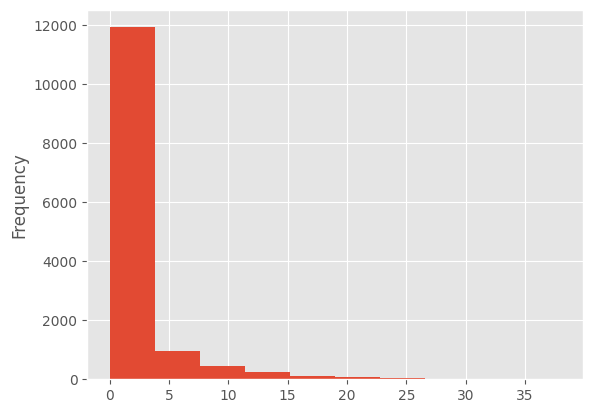

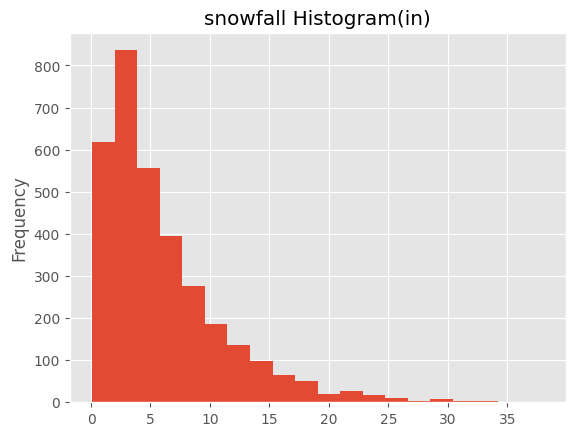

In [106]:
snow.plot.hist()  # heavily skewed
plt.show()

snow[snow>0].plot.hist(bins=20,title='snowfall Histogram(in)')
plt.show()

## box

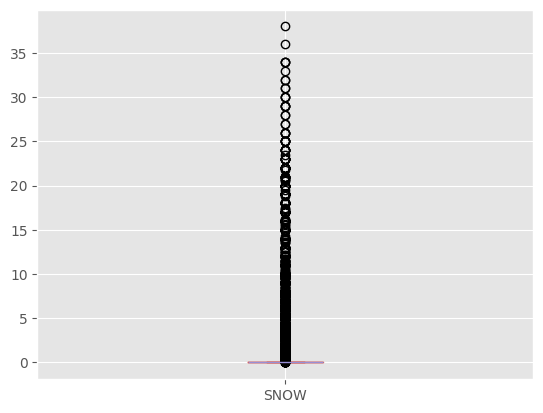

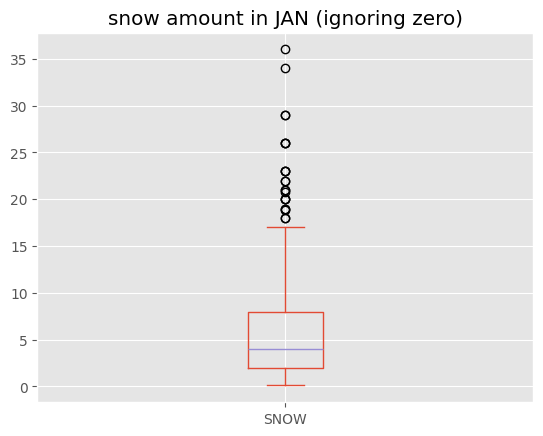

In [109]:
snow.plot.box()
plt.show()

snow[lambda s:(s.index.month==1) &(s>0)].plot.box(title="snow amount in JAN (ignoring zero)")
plt.show()

## kde
This is essentially a smoothed histogram

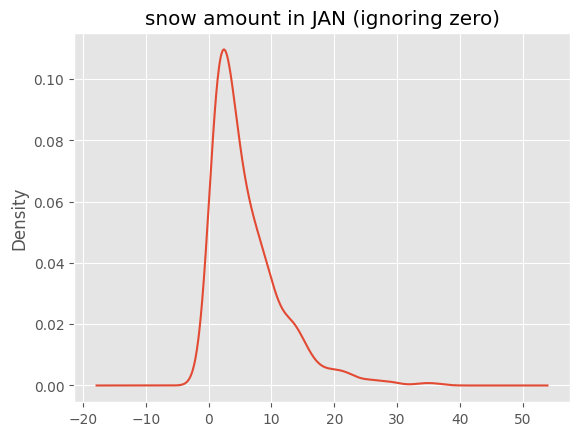

In [111]:
snow[lambda s:(s.index.month==1) &(s>0)].plot.kde(title="snow amount in JAN (ignoring zero)")
plt.show()

## line

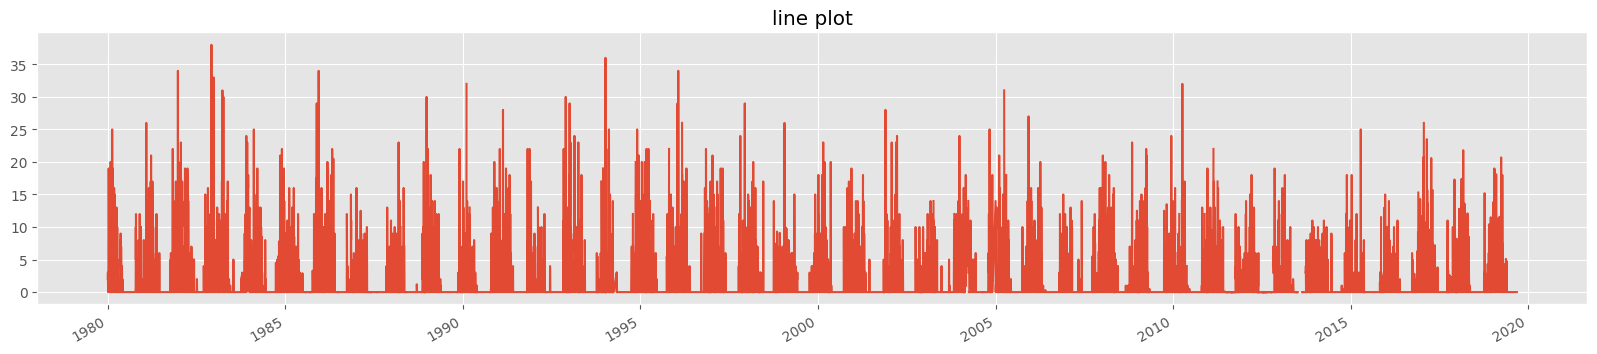

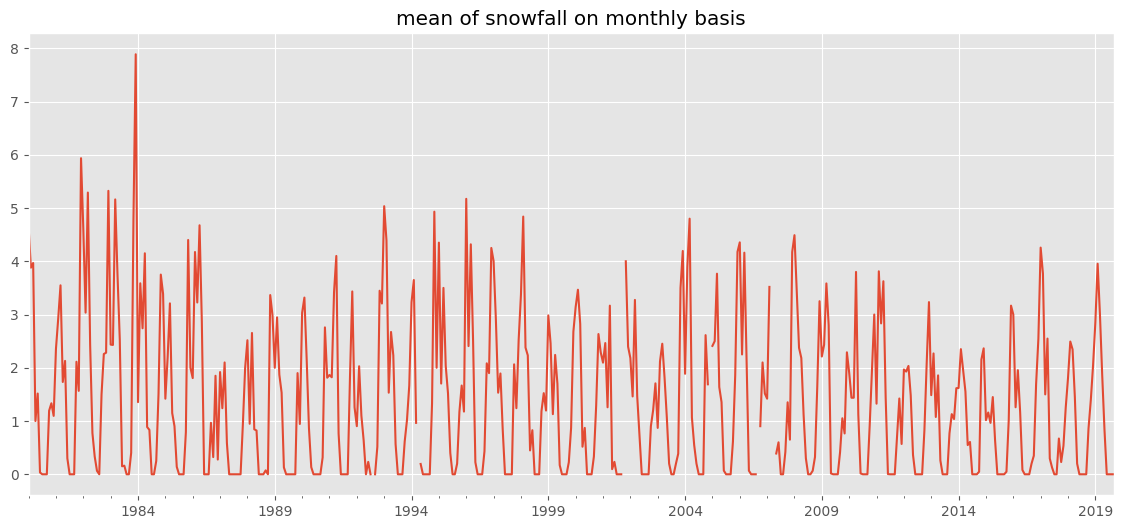

In [114]:
snow.plot.line(title='line plot',figsize=(20,4))
plt.show()

snow.resample('M').mean().plot.line(title='mean of snowfall on monthly basis',figsize=((14,6)))
plt.show()

## line plot with multiple aggregations

Plotting can be even more powerful with dataframes. If we chain the `.unstack` method, we can pull out the inner index into columns and create a df that has a column for each axis

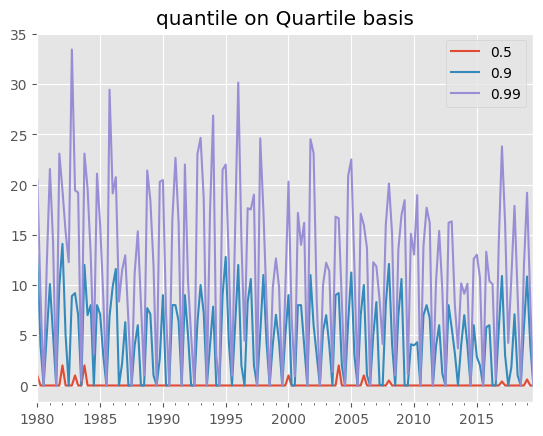

In [118]:
snow.resample('Q').quantile([.5,.9,.99]).unstack().plot.line(title="quantile on Quartile basis")
plt.show()

## bar

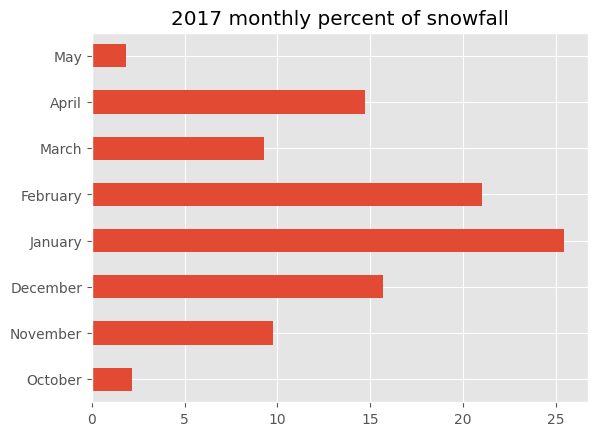

In [122]:
season2017.resample('M').sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name()).plot.barh(title="2017 monthly percent of snowfall")
plt.show()


## pie

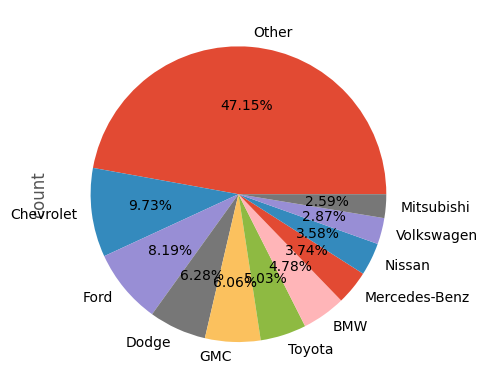

In [124]:
make.where(make.isin(top10),'Other').value_counts().plot.pie(autopct="%.2f%%")
plt.show()

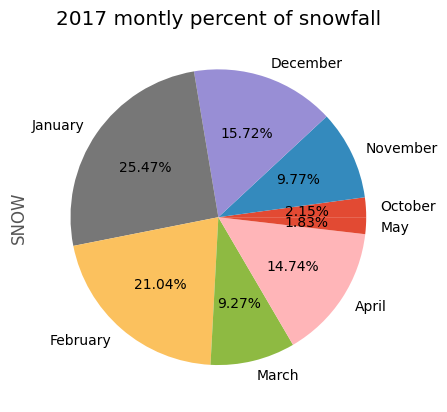

In [127]:
season2017.resample("M").sum().div(season2017.sum()).mul(100).rename(lambda idx:idx.month_name()).plot.pie(autopct="%.2f%%",title="2017 montly percent of snowfall")
plt.show()

## styling

#  Categorical Manipulation

## Categorical data

## Frequency Counts

## benefits of categories

## conversion to Ordinal categories

## .cat accessor

## category gotchas

## generalization

#  Dataframes

## database and spreedsheet analogues

## simple python version

## Dataframes

## Construction

## Dataframe Axis

#  Similarities with Series and DataFrame

## getting the data

## view data

#  Math Methods in DataFrames

## Index alignment

## duplicate index

#  Looping and Aggregation

## for loops

## aggregaions

## .apply method

#  Columns Types, .assign an Memory Usage

## Conversion methods

## memory usage

#  Creating and Updating Columns

## Loading the Data

## more column cleanup

#  Dealing with Missing and Duplicated Data

## Missing data

## duplicates

#  Sorting Columns and Indexes

## Soring columns


## Sorting columns Order


## Setting and Sorting the index

#  Filtering and Indexing Operations

## Renaming an Index

## Resetting the Index

## Dataframe Indexing, Filtering & Querying

## Indexing by Position

## Indexing 

#  Plotting with DataFrames

## line plots


## bar


## scatter


## area and stacked bar


## column distributions with KDEs,Histograms and Boxplots

#  Reshaping Dataframes with Dummies

## dummy columns


## undoing dummy columns

#  Reshaping By Pivoting and Grouping


## Using a custom Aggregation function


## multiple aggregation


## per column aggregations


## grouping by hierarchy

## grouping with functions


#  More Aggregations


## Aggregation while keeping rows

## Filtering parts of groups

#  Cross-tabulation Deep Dive

## cross-tabulation

## adding margins


## normalizing results


## hierarchical columns with cross tabulations


## heatmaps


#  Melting, Transpose and Stacking Data


## melting data


## Un-melting data


## Transposing data


## stacking and Unstacking


## Flattening hierarchical index and columns

#  Working with TimeSeries


## loading the data


## adding timezone info


## exploring the data


## slicing ts


## missing ts data


## exploring seasonality


## resampling data


## rules with offset aliases


## combining offset aliases


## anchored offset aliases


## resampling to finger-grain frequency


## grouping a date column with pd.Grouper

#  Joining Dataframes

## Adding rows to Dataframes

## Adding cols to Dataframes


## Joins


## joins indicators


## merge validations


## joining data example


## dirty devil flow and weather data


## joining data


## validating joined data


## visualization of merged data


#  Exporting data

## Dirty devil data

## read and write

## create csv


## export to excel

## feather


## sql


## json

#  Styling Dataframes

## Loading the Data

## Sparklines


## .style


## Formatting


## Embedding Bar plots


## Highlighting


## Heatmap and gradients

## Captions


## css properties


## stickiness and hidding

## hiding the index

#  Debugging pandas


## Checking if Dataframe are Equal


## Debugging Chains


## Debugging Apply

## Memory Usage


## Timing Info
